### Importing libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing dataset

In [67]:
df = pd.read_csv('TITANIC.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

## Univariate Data Analysis

#### Survived

In [68]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

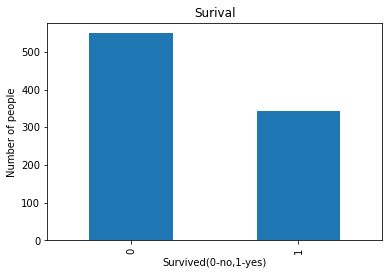

In [69]:
df['Survived'].value_counts().plot.bar()
plt.xlabel('Survived(0-no,1-yes)')
plt.ylabel('Number of people')
plt.title('Surival')
plt.show()

#### Sex

In [70]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

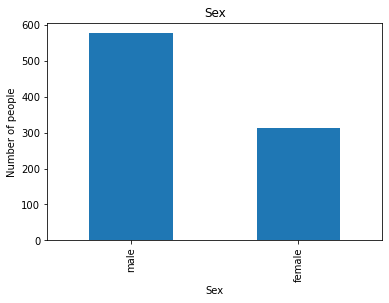

In [71]:
df['Sex'].value_counts().plot.bar()
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.title('Sex')
plt.show()

#### PClass

In [72]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

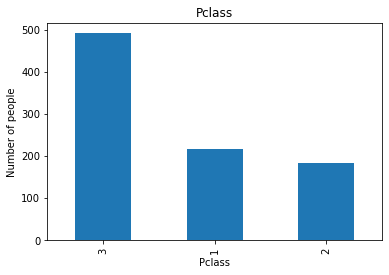

In [73]:
df['Pclass'].value_counts().plot.bar()
plt.xlabel('Pclass')
plt.ylabel('Number of people')
plt.title('Pclass')
plt.show()

#### SibSp

In [74]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

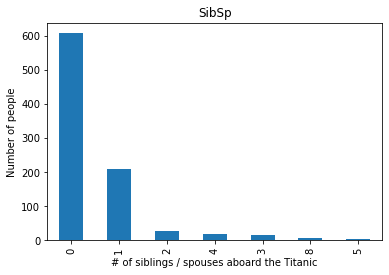

In [75]:
df['SibSp'].value_counts().plot.bar()
plt.xlabel('# of siblings / spouses aboard the Titanic')
plt.ylabel('Number of people')
plt.title('SibSp')
plt.show()

#### Parch

In [76]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

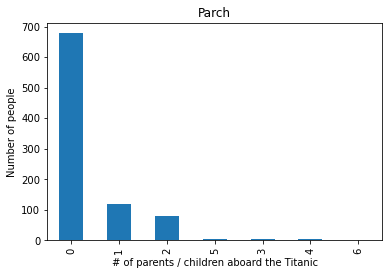

In [77]:
df['Parch'].value_counts().plot.bar()
plt.xlabel('# of parents / children aboard the Titanic')
plt.ylabel('Number of people')
plt.title('Parch')
plt.show()

#### Embarked

In [78]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

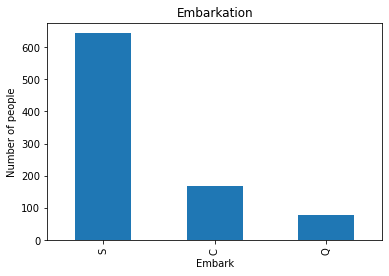

In [79]:
df['Embarked'].value_counts().plot.bar()
plt.xlabel('Embark')
plt.ylabel('Number of people')
plt.title('Embarkation')
plt.show()

#### Age

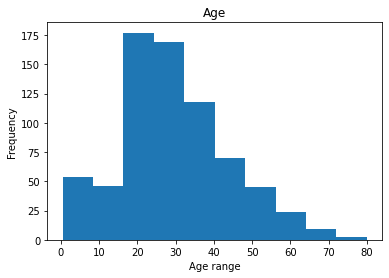

In [80]:
df['Age'].plot.hist()
plt.xlabel('Age range')
plt.title('Age')
plt.show()

#### Fare

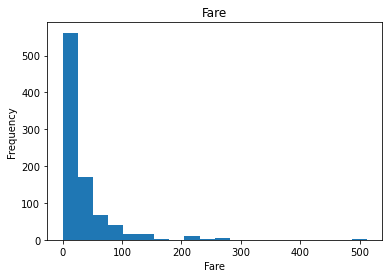

In [81]:
df['Fare'].plot.hist(bins=20)
plt.xlabel('Fare')
plt.title('Fare')
plt.show()

## Bivariate Data Analysis

### Sex v/s Survival

In [82]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


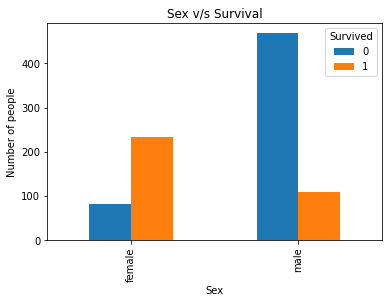

In [83]:
pd.crosstab(df['Sex'],df['Survived']).plot(kind="bar", stacked=False)
plt.ylabel('Number of people')
plt.title('Sex v/s Survival')
plt.show()

### Pclass v/s Survival

In [84]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


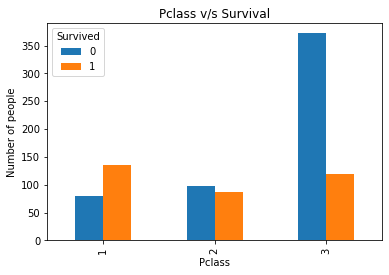

In [85]:
pd.crosstab(df['Pclass'],df['Survived']).plot(kind="bar", stacked=False)
plt.ylabel('Number of people')
plt.title('Pclass v/s Survival')
plt.show()

### SibSp v/s Survival

In [86]:
pd.crosstab(df['SibSp'],df['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


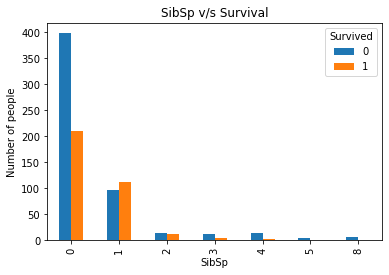

In [87]:
pd.crosstab(df['SibSp'],df['Survived']).plot(kind="bar", stacked=False)
plt.ylabel('Number of people')
plt.title('SibSp v/s Survival')
plt.show()

### Embarkation v/s survival

In [88]:
pd.crosstab(df['Embarked'],df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


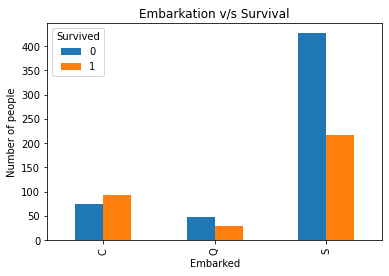

In [89]:
pd.crosstab(df['Embarked'],df['Survived']).plot(kind="bar", stacked=False)
plt.ylabel('Number of people')
plt.title('Embarkation v/s Survival')
plt.show()

### Parch v/s Survival

In [90]:
pd.crosstab(df['Parch'],df['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


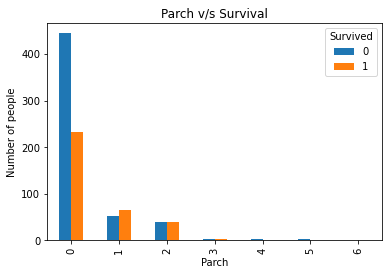

In [91]:
pd.crosstab(df['Parch'],df['Survived']).plot(kind="bar", stacked=False)
plt.ylabel('Number of people')
plt.title('Parch v/s Survival')
plt.show()

### Age v/s Survival

In [92]:
bins = [0,15,60,80]
groups = ['children(0-15)','adult(15-60)','old aged(60+)']
age_group = pd.cut(df.Age,bins,labels=groups)
pd.crosstab(age_group,df['Survived'])

Survived,0,1
Age,,
children(0-15),34,49
adult(15-60),373,236
old aged(60+),17,5


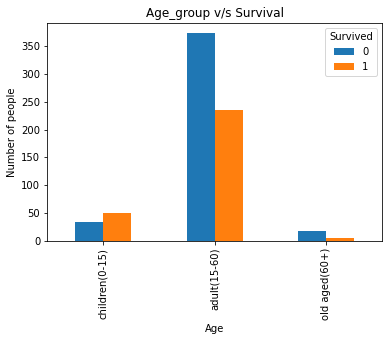

In [93]:
pd.crosstab(age_group,df['Survived']).plot(kind='bar')
plt.ylabel('Number of people')
plt.title('Age_group v/s Survival')
plt.show()

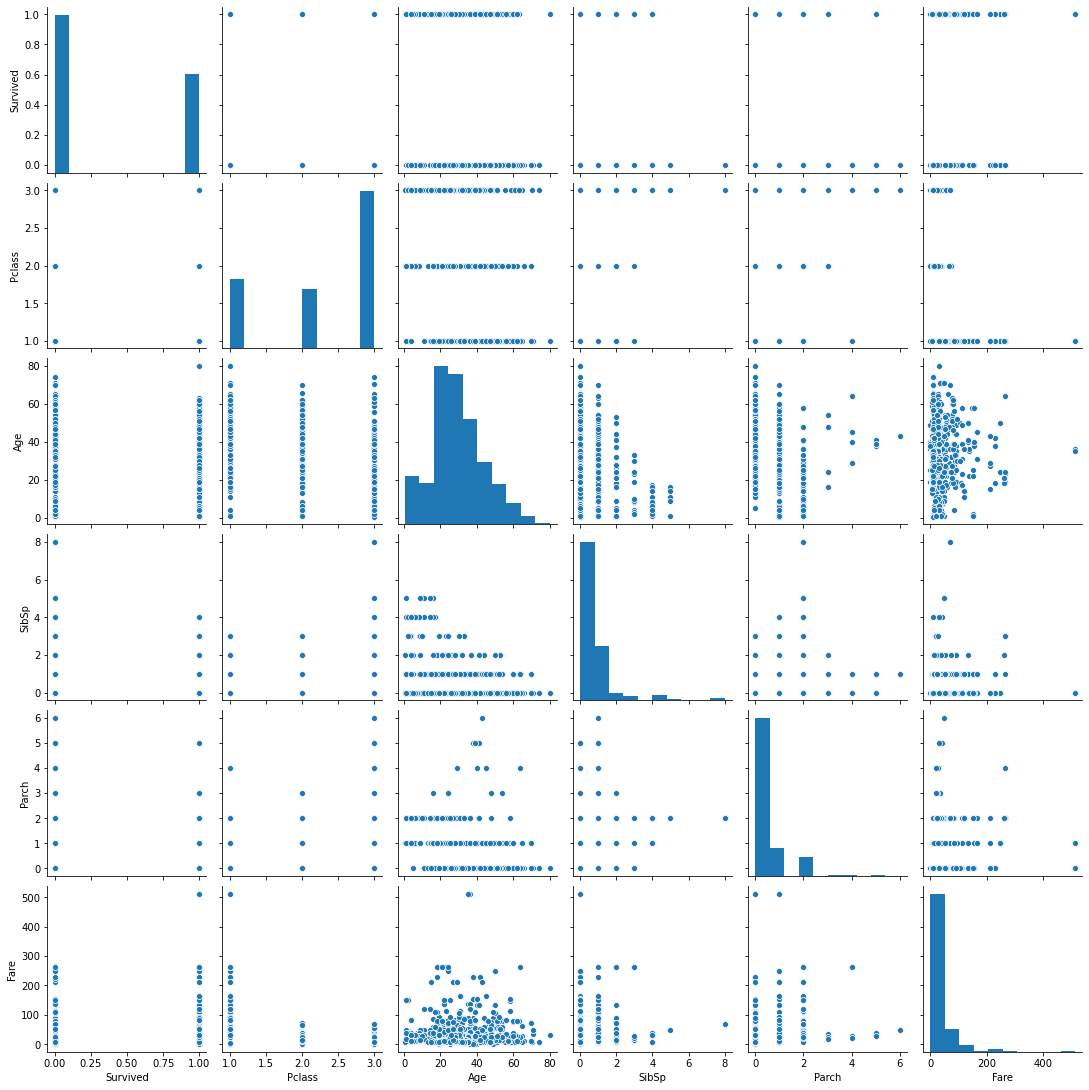

In [94]:
import seaborn as sns
sns.pairplot(df.iloc[:,1:])

## Model Building

Drop columns which are not required to build model

In [95]:
data = df
data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [96]:
data = data[data['Fare']<500]

In [97]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [98]:
data.shape

(888, 8)

Check for any missing values

In [99]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Missing value of Age column is filled with mean value of age and 2 missing Embarked value is dropped

In [100]:
data['Age'] = data['Age'].fillna(data.Age.mean())

In [101]:
data[data.Age>55].shape

(40, 8)

In [102]:
data.dropna(axis=0,inplace=True)

In [103]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [104]:
data.shape

(886, 8)

data is ready to build model

In [105]:
data = pd.get_dummies(data)

In [106]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [107]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [108]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [109]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((708, 10), (178, 10), (708,), (178,))

#### Apply Feature Scaling

In [110]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

#### Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(X_train,y_train)

c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
y_pred = lreg.predict(X_test)

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[97 15]
 [17 49]]


0.8202247191011236

#### Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [115]:
y_pred = dtc.predict(X_test)

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[87 25]
 [16 50]]


0.7696629213483146

#### K-Neighbours Classifier

In [117]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) 
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [118]:
y_pred = knn.predict(X_test)

In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[90 22]
 [28 38]]


0.7191011235955056

#### Naive Bayes Classifier

In [120]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [121]:
y_pred = gnb.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[91 21]
 [15 51]]


0.797752808988764

#### Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [124]:
y_pred = rfc.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[100  12]
 [ 17  49]]


0.8370786516853933

Of all the classifier models Random Forest has the best accuracy score

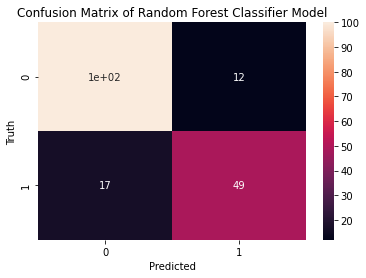

In [126]:
import matplotlib.pyplot as plt
import seaborn as sn
#plt.figure(figsize = (5,5))
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix of Random Forest Classifier Model')
plt.show()

#### Survival prediction

In [127]:
survive = {0:'May Not Survive',1:'May Survive'}

1st parameter - Pclass(1 ,2 or 3)

2nd - Age

3rd - SibSp(1-6)

4th - Parch(1-6)

5th - Fare(0-500)

6th - Female(if yes 1 , else 0)

7th - Male(if yes 1 , else 0)

8th - Embarked(C)(if yes 1 , else 0)

9th - Embarked(Q)(if yes 1 , else 0)

10th - Embarked(S)(if yes 1 , else 0)

In [128]:
prediction = rfc.predict([[1,15,1,5,50,1,0,0,1,0]])
survive[prediction[0]]

'May Survive'

In [129]:
import pickle

In [130]:
with open('model_pickel','wb')as f:
    pickle.dump(rfc,f)